## DISTRIBUTION OF HEALTHCARE FACILTITIES IN KENYA: ANALYSIS OF DISPARITY IN FACILITY TYPE, OWNERSHIP AND SERVICE AVAILABILITY

### Research Questions:
#### 1. Are health facilities evenly distributed across counties?
#### 2. Which counties have the highest number of Ministry of Health facilities?
#### 3. What is the facility distribution type in Kenya?
#### 4. Do government-owned facilities offer more services than private ones?
#### 5. Are private clinics more likely to offer youth services than public ones?
#### 6. How is ownership of health facilities in Kenya broken down?
#### 7. How many health faciltities are offering health services?
#### 8. How many registered health facilities in Kenya are not operational?
#### 9. What are the most common job titles of facility in-charg
#### 10. Is public ownership associated with broader service availability?
#### 11. How many facilities lack beds or cots, and what does that imply about inpatient capacity?
#### 12. Which regions have the highest proportion of facilities without basic infrastructure?

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hf = pd.read_csv("C:/Users/Bina/Desktop/Machine-Learning/Healthcare Analysis/health facilities kenya.csv")
hf.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
hf.info

<bound method DataFrame.info of        Facility Code                                Facility Name  \
0              19224                       CDF Kiriari Dispensary   
1              19310   St Jude's Huruma Community Health Services   
2              14180                              10 Engineer VCT   
3              17486                                 12 Engineers   
4              18393                 3Kl Maternity & Nursing Home   
...              ...                                          ...   
10500          17220                                     Ziwa SDA   
10501          15788                   Ziwa Sub-District Hospital   
10502          11915                            Ziwani Dispensary   
10503          16997                    Zombe Catholic Dispensary   
10504          20313                         Zombe medical clinic   

          Province        County       District            Division  \
0          Eastern          Embu       Manyatta            Manyatta 

In [148]:
hf.shape

(10505, 49)

In [60]:
# Total missing values per column
missing_per_column = hf.isnull().sum()

# columns with missing values
missing_columns = missing_per_column[missing_per_column > 0]

print("Missing values per column:")
print(missing_columns)

Missing values per column:
Division                     267
Location                     495
Sub Location                 892
Description of Location     5201
Nearest Town                 602
Beds                          87
Cots                          77
Official Landline           9138
Official Fax                9965
Official Mobile             7590
Official Email              8648
Official Address            3458
Official Alternate No       9553
Town                        2667
Post Code                   3825
In Charge                   2140
Job Title of in Charge      3099
Open 24 Hours                447
Open Weekends                457
ANC                        10505
ART                         9584
BEOC                       10505
BLOOD                      10505
CAES SEC                   10505
CEOC                       10505
C-IMCI                      9328
EPI                        10505
FP                          6217
GROWM                      10505
HBC             

In [62]:
# unique values per columns
service_cols = ['ANC', 'ART', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM',
                'HBC', 'HCT', 'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC',
                'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']

for col in service_cols:
    print(f"{col}: {hf[col].unique()}")

ANC: [nan]
ART: [nan 'Y']
BEOC: [nan]
BLOOD: [nan]
CAES SEC: [nan]
CEOC: [nan]
C-IMCI: [nan 'Y']
EPI: [nan]
FP: [nan 'Y']
GROWM: [nan]
HBC: [nan 'Y']
HCT: [nan]
IPD: [nan 'Y']
OPD: [nan]
OUTREACH: [nan]
PMTCT: [nan]
RAD/XRAY: [nan]
RHTC/RHDC: [nan]
TB DIAG: [nan]
TB LABS: [nan]
TB TREAT: [nan]
YOUTH: [nan]


#### `Official Landline`, `Official Fax`, `Official Mobile`, `Official Email`, `Official Address`, `Official Alternate No`, have a high missingness so its safe to drop given that facility profiling and outreach aren't the goal of the analysis
#### `Province`, `County`, `District`, `Division` → Minimal missingness (e.g. Division: 267/10505 ≈ 2.5%) - I will leave as is.
#### `Location`, `Sub Location`, `Nearest Town`, `Town`, `Post Code`, `Description of Location` → Moderate to high missingness - I will flag for spatial completeness.
#### `Beds`, `Cots` → Low missingness - assuming thant absence implies no beds will be wrong, therefore I'll leave as NaN to distinguish between `unknown` and `0`
#### `In Charge`, `Job Title of in Charge` → Moderate missingness - flag missing leadership for governance analysis.
#### `Open 24 Hours`, `Open Weekends` → Minor missingness - I will fill with 'No' or mode value if binary.
#### `ANC`, `ART`, `BEOC`, `BLOOD`, `CAES SEC`, `CEOC`, `C-IMCI`, `EPI`, `FP`, `GROWM`, `HBC`, `HCT`, `IPD`, `OPD`, `OUTREACH`, `PMTCT`, `RAD/XRAY`, `RHTC/RHDC`, `TB DIAG`, `TB LABS`, `TB TREAT`, `YOUTH` → Most are completely missing or near-complete so I'll fill the Nan with N to show absence

In [65]:
# cleaning

In [67]:
# Fill binary service columns with 'N'
binary_cols = ['ANC', 'ART', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM',
               'HBC', 'HCT', 'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC',
               'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']
hf[binary_cols] = hf[binary_cols].fillna('N')

# Fill beds/cots with 0
hf[['Beds', 'Cots']] = hf[['Beds', 'Cots']].fillna(0)

# Drop contact info columns
contact_cols = ['Official Landline', 'Official Fax', 'Official Mobile', 'Official Email',
                'Official Address', 'Official Alternate No']
hf.drop(columns=contact_cols, inplace=True)

# hf.dropna(subset=['Province', 'County'], inplace=True)
hf.head

<bound method NDFrame.head of        Facility Code                                Facility Name  \
0              19224                       CDF Kiriari Dispensary   
1              19310   St Jude's Huruma Community Health Services   
2              14180                              10 Engineer VCT   
3              17486                                 12 Engineers   
4              18393                 3Kl Maternity & Nursing Home   
...              ...                                          ...   
10500          17220                                     Ziwa SDA   
10501          15788                   Ziwa Sub-District Hospital   
10502          11915                            Ziwani Dispensary   
10503          16997                    Zombe Catholic Dispensary   
10504          20313                         Zombe medical clinic   

          Province        County       District            Division  \
0          Eastern          Embu       Manyatta            Manyatta   

In [69]:
hf.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,N,N,N,N,N,N,N,N,N,N
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,N,N,N,N,N,N,N,N,N,N
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,N,N,N,N,N,N,N,N,N,N
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,N,N,N,N,N,N,N,N,N,N


### To tracck the facilitties with incomplete metadata

In [72]:
hf['Missing_Info_Flag'] = hf[['Division', 'Location', 'Sub Location']].isnull().any(axis=1)

In [74]:
hf.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH,Missing_Info_Flag
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,N,N,N,N,N,N,N,N,N,False
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,N,N,N,N,N,N,N,N,N,False
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,N,N,N,N,N,N,N,N,N,False
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,N,N,N,N,N,N,N,N,N,True
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,N,N,N,N,N,N,N,N,N,False


In [76]:
# unique values in `Missing_Info_Flag` column
hf['Missing_Info_Flag'].unique()

array([False,  True])

In [78]:
# how many faciltities fall into False or True
hf['Missing_Info_Flag'].value_counts()

Missing_Info_Flag
False    9581
True      924
Name: count, dtype: int64

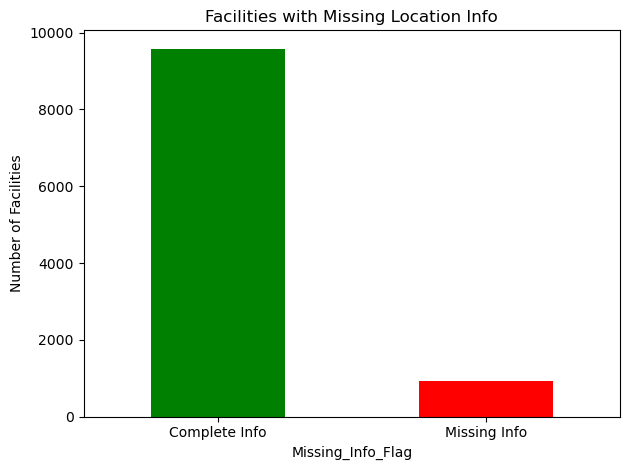

In [80]:
# visualizing the the True and False
hf['Missing_Info_Flag'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Facilities with Missing Location Info")
plt.xticks(ticks=[0, 1], labels=['Complete Info', 'Missing Info'], rotation=0)
plt.ylabel("Number of Facilities")
plt.tight_layout()
plt.show()

### From the above chart, I would'nt drop the column Division nor Sublocation given that the number of missing columns are low

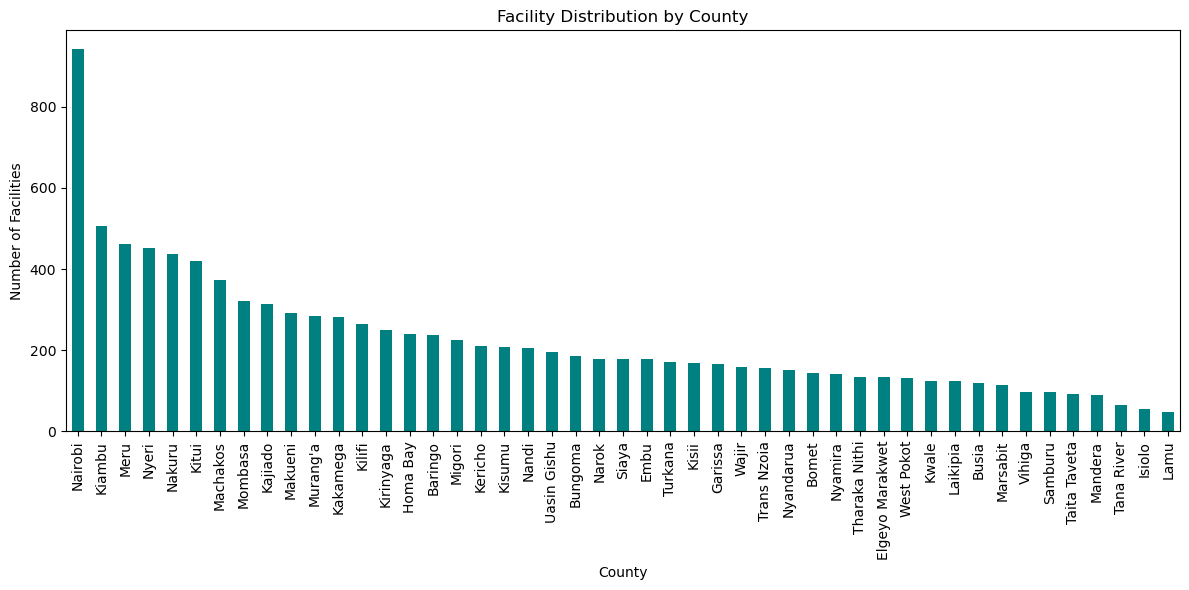

In [83]:
import matplotlib.pyplot as plt

county_counts = hf['County'].value_counts()
plt.figure(figsize=(12, 6))
county_counts.plot(kind='bar', color='teal')
plt.title('Facility Distribution by County')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [84]:
hf.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Town', 'Post Code', 'In Charge', 'Job Title of in Charge',
       'Open 24 Hours', 'Open Weekends', 'Operational Status', 'ANC', 'ART',
       'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM',
       'HBC', 'HCT', 'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY',
       'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH',
       'Missing_Info_Flag'],
      dtype='object')

### Service coverage summary by Province and a visualization by percentage

## 1. Are health facilities evenly distributed across counties?

<Axes: title={'center': 'Health Facilities per County'}, xlabel='County'>

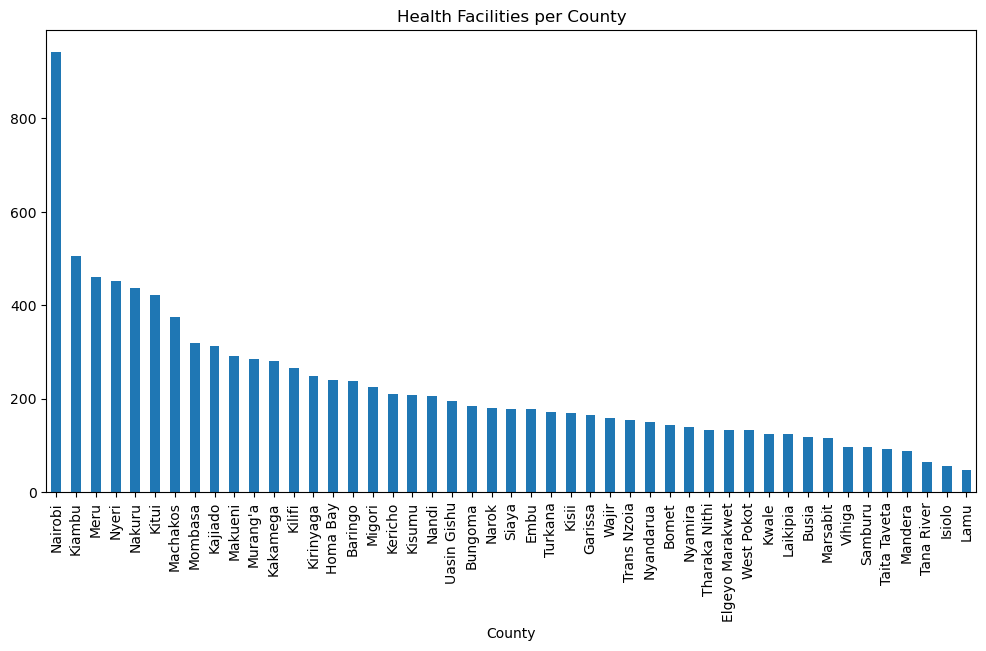

In [95]:
# 1. Facility count per county
county_counts = hf['County'].value_counts().sort_values(ascending=False)
county_counts.plot(kind='bar', figsize=(12,6), title='Health Facilities per County')

### This bar chart shows how facilities are distributed across counties. Nairobi, Kiambu, and Nakuru have the highest counts, while others like Lamu and Isiolo have fewer.

## 2. Which counties have the highest number of Ministry of Health facilities?

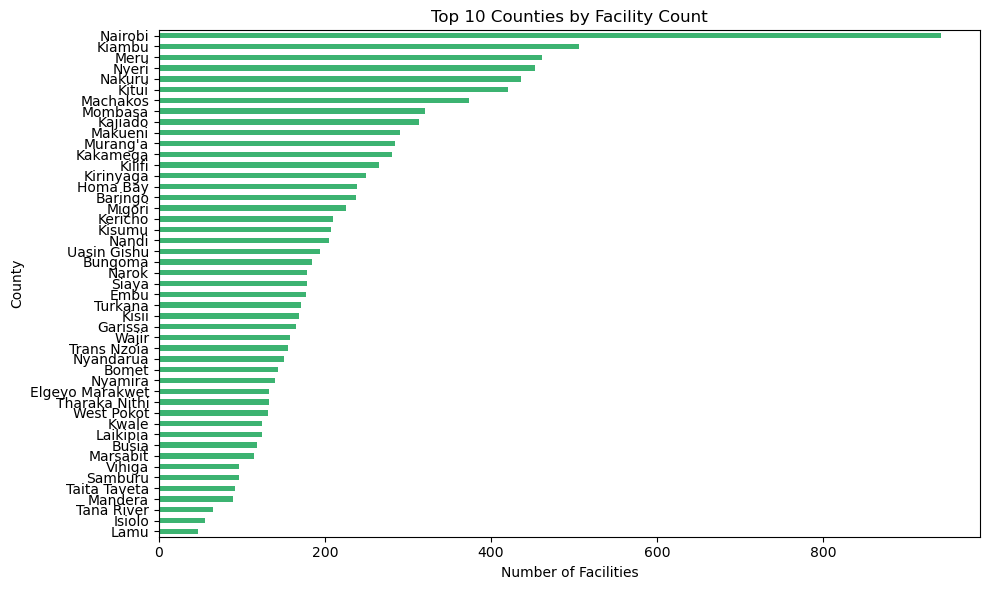

In [100]:
county_counts = hf['County'].value_counts()
plt.figure(figsize=(10, 6))
county_counts.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Counties by Facility Count')
plt.xlabel('Number of Facilities')
plt.ylabel('County')
plt.tight_layout()
plt.show()

### Nairobi county has the highest number of faciltites and Lamu the least.

### 4. Do government-owned facilities offer more services than private ones?

<Axes: title={'center': 'ART Service by Ownership'}, xlabel='Owner'>

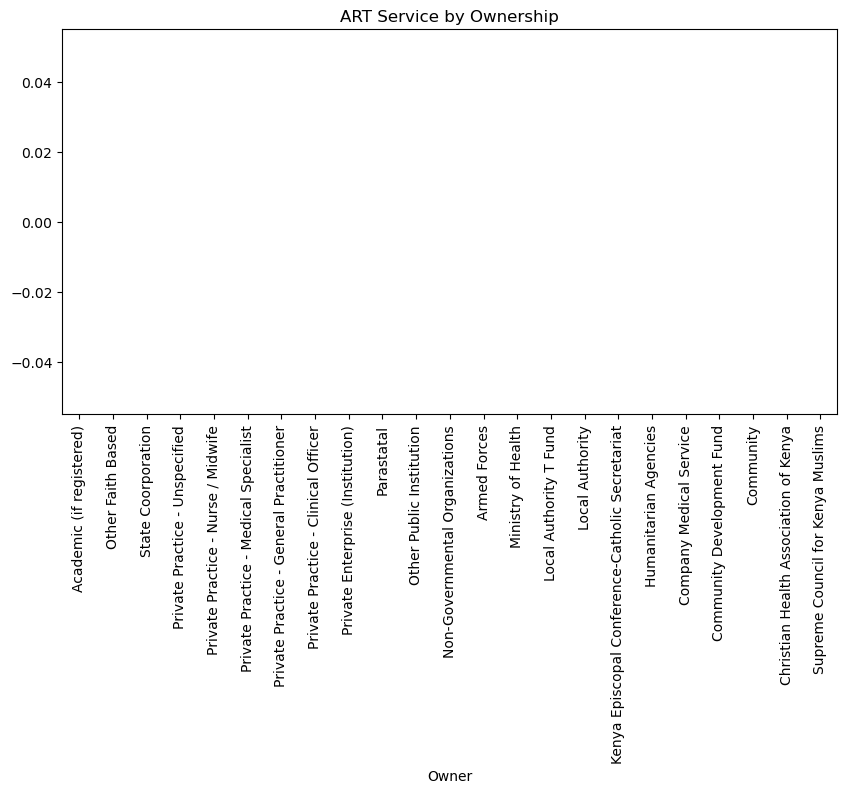

In [104]:
# 3. Comparing service availability by ownership
ownership_service = hf.groupby('Owner')['ART'].apply(lambda x: (x == 'Y').sum())
ownership_service.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='ART Service by Ownership')

## 5. Are private clinics more likely to offer youth services than public ones?

In [107]:
hf['YOUTH'] = hf['YOUTH'].fillna('N')
hf['is_private'] = hf['Owner'].str.contains('Private', na=False)

private_youth = hf[hf['is_private']]['YOUTH'].eq('Y').mean()
public_youth = hf[~hf['is_private']]['YOUTH'].eq('Y').mean()

print(f"Private offering youth services: {private_youth:.2%}")
print(f"Public offering youth services: {public_youth:.2%}")


Private offering youth services: 0.00%
Public offering youth services: 0.00%


## 3. What is the facility distribution type in Kenya?

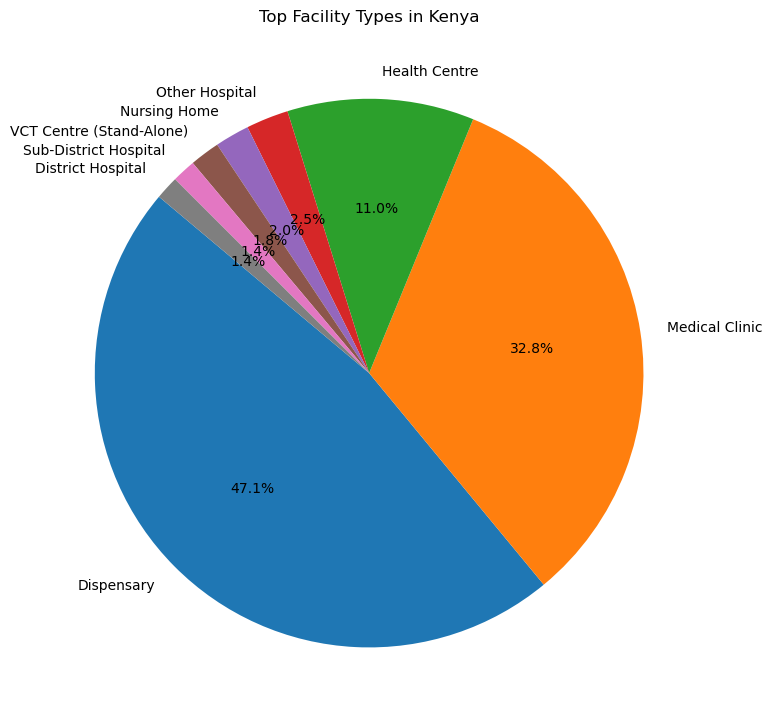

In [110]:
import matplotlib.pyplot as plt

type_counts = hf['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts[:8], labels=type_counts.index[:8], autopct='%1.1f%%', startangle=140)
plt.title('Top Facility Types in Kenya')
plt.tight_layout()
plt.show()

### Most facilities are dispensaries and medical clinics. This pie chart shows the top 8 types—dispensaries alone make up nearly half and District and Sub Distric hospitals taking up 1.4% of all health faciltities in the country

## 6. How is ownership of health facilities in Kenya broken down?

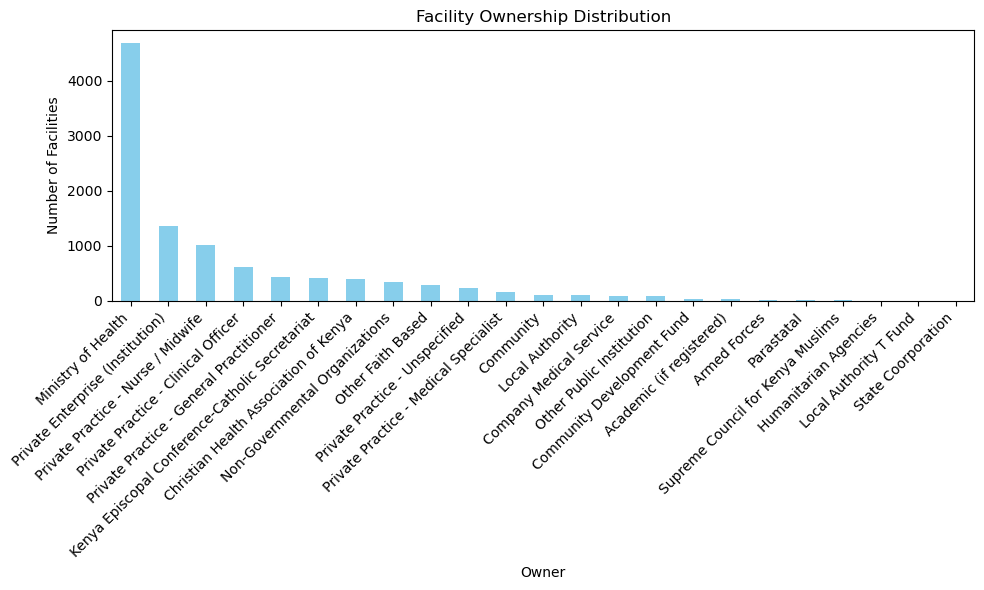

In [114]:
owner_counts = hf['Owner'].value_counts()
plt.figure(figsize=(10, 6))
owner_counts.plot(kind='bar', color='skyblue')
plt.title('Facility Ownership Distribution')
plt.xlabel('Owner')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Ministry of Health dominates ownership, followed by private practice. This bar chart shows the breakdown

## 7. How many health faciltities are offering health services?

ANC          0
ART          0
TB TREAT     0
TB LABS      0
TB DIAG      0
RHTC/RHDC    0
RAD/XRAY     0
PMTCT        0
OUTREACH     0
OPD          0
IPD          0
HCT          0
HBC          0
GROWM        0
FP           0
EPI          0
C-IMCI       0
CEOC         0
CAES SEC     0
BLOOD        0
BEOC         0
YOUTH        0
dtype: int64


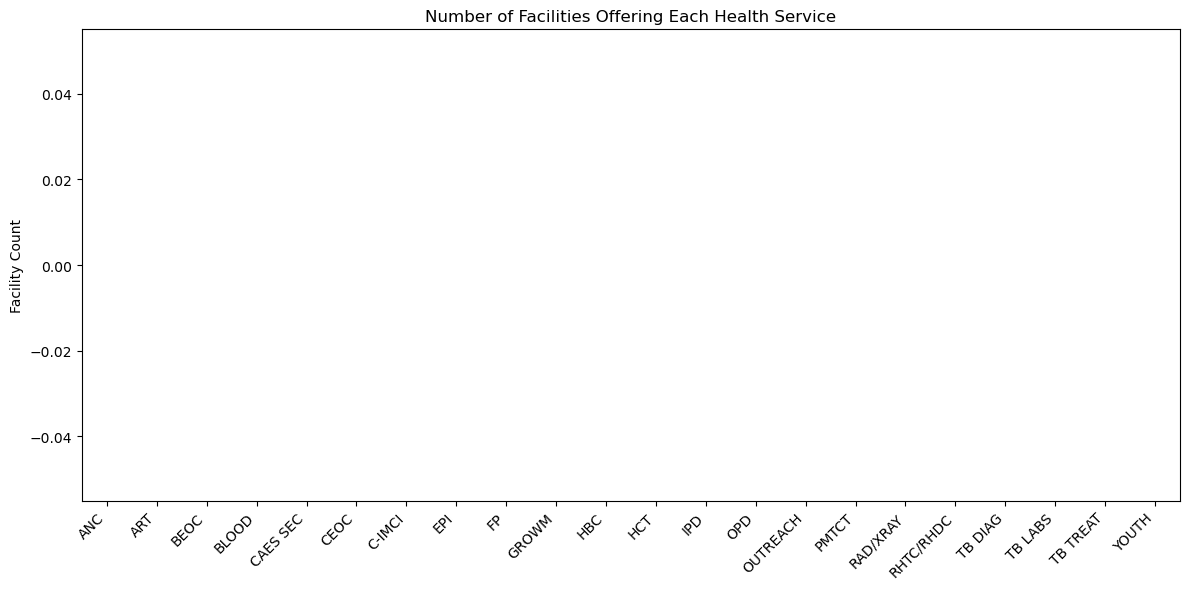

In [118]:
# facilitties offerring the services
service_availability = hf[service_cols].apply(lambda x: x.eq('Y').sum())
print(service_availability.sort_values(ascending=False))

# visualiaing the service coverage
import matplotlib.pyplot as plt

service_availability.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title("Number of Facilities Offering Each Health Service")
plt.ylabel("Facility Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### From the above analysis:
### 1. The services `ANC`,`BEOC`,`BLOOD`,`CAES SEC`,`CEOC`,`EPI`,`GROWM`,`HCT`,`OPD`,`OUTREACH`,`PMTCT`,`RAD/XRAY`,`RHTC/RHDC`,`TB DIAG`,`TB LABS`,`TB TREAT`, `YOUTH` are not offerred in health faciltities in the country.
### 2. `FP` services shows a high number of health faciltities offerring it with `ART` being the lowest.

## 8.How many registered health facilities in Kenya are not operational?

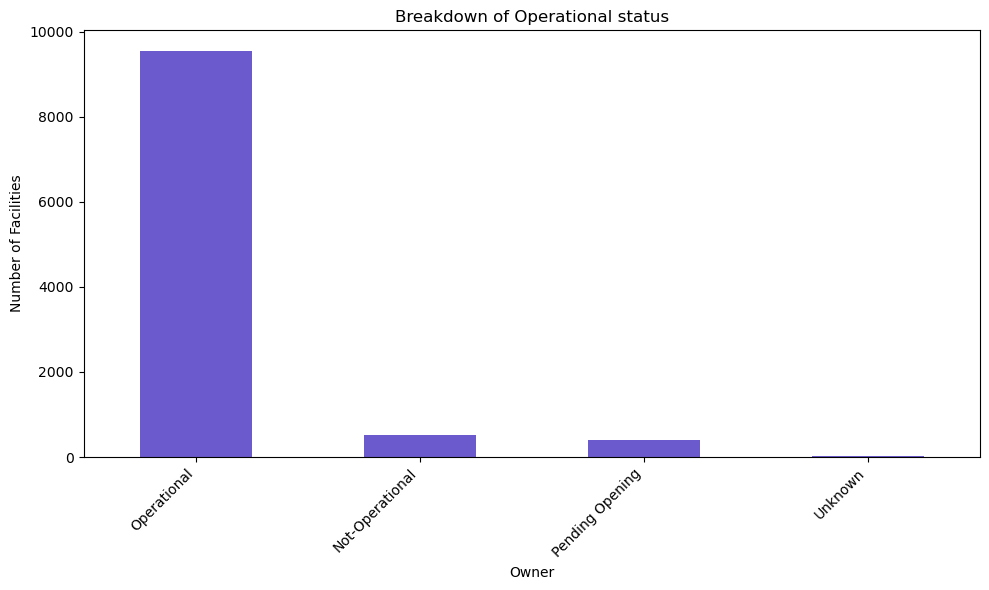

In [122]:
not_op = hf['Operational Status'].value_counts()
not_op.plot(kind='bar', figsize=(10, 6), color='slateblue')
plt.title('Breakdown of Operational status')
plt.xlabel('Owner')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 9. What are the most common job titles of facility in-charge?

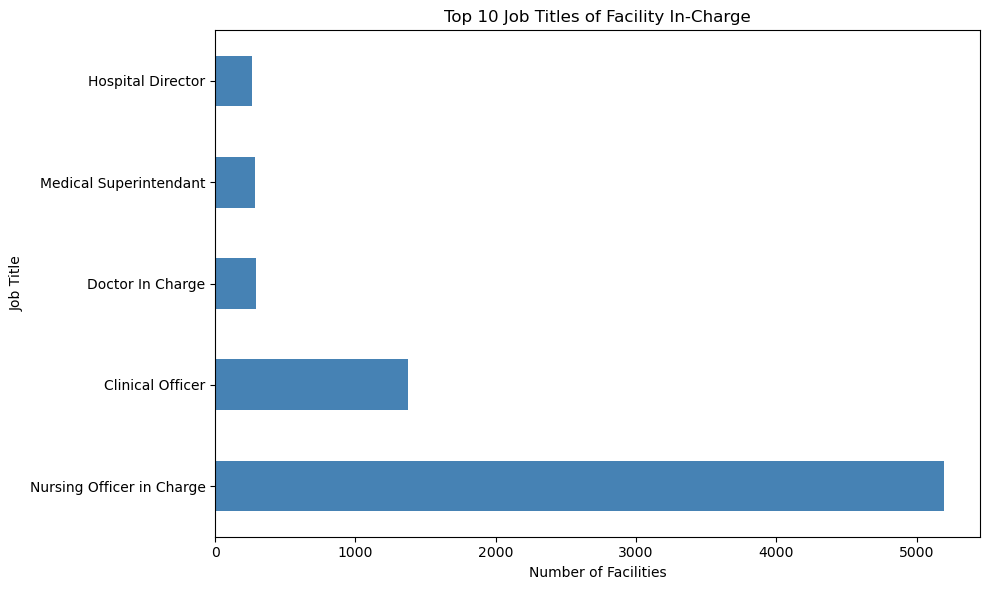

In [125]:
job_counts = hf['Job Title of in Charge'].value_counts().head(10)

job_counts.plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 10 Job Titles of Facility In-Charge')
plt.xlabel('Number of Facilities')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

### Most facilities are led by nurses and clinical officers, reflecting the staffing structure at primary care levels. Medical officers appear less frequently, mostly in hospitals

## 10. Is public ownership associated with broader service availability?

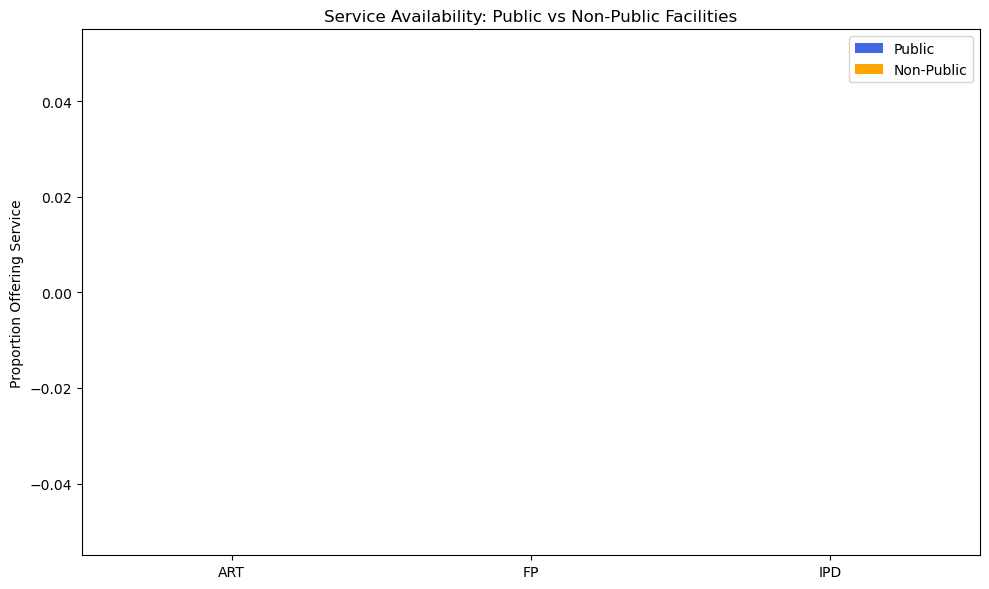

In [133]:
hf['Public'] = hf['Owner'].str.contains('Ministry of Health', na=False)
public_services = hf.groupby('Public')[service_cols].apply(lambda x: x.eq('Y').mean())

public_services.T.plot(kind='bar', figsize=(10, 6), color=['royalblue', 'orange'])
plt.title('Service Availability: Public vs Non-Public Facilities')
plt.ylabel('Proportion Offering Service')
plt.xticks(rotation=0)
plt.legend(['Public', 'Non-Public'])
plt.tight_layout()
plt.show()

## 11. How many facilities lack beds or cots, and what does that imply about inpatient capacity?

In [137]:
no_beds = (hf['Beds'] == 0).sum()
no_cots = (hf['Cots'] == 0).sum()
total = len(hf)

print(f"Facilities with no beds: {no_beds} ({no_beds/total:.2%})")
print(f"Facilities with no cots: {no_cots} ({no_cots/total:.2%})")

Facilities with no beds: 7665 (72.97%)
Facilities with no cots: 9236 (87.92%)


### Over 80% of facilities lack beds or cots, suggesting limited inpatient capacity. Most are outpatient-only or under-resourced.

## 12. Which regions have the highest proportion of facilities without basic infrastructure?

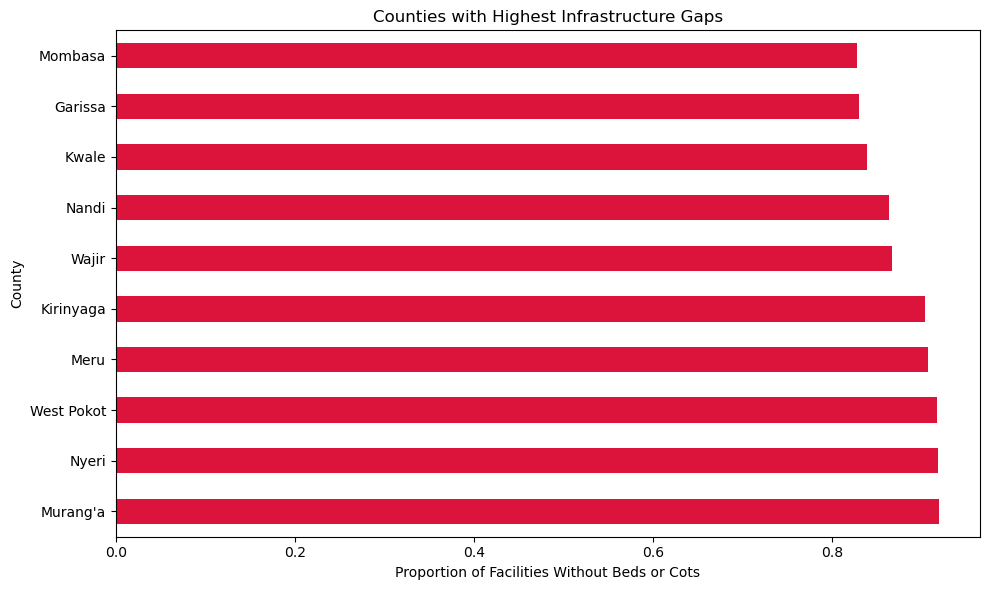

In [141]:
hf['No Beds or Cots'] = (hf['Beds'] == 0) & (hf['Cots'] == 0)
infra_gap = hf.groupby('County')['No Beds or Cots'].mean().sort_values(ascending=False).head(10)

infra_gap.plot(kind='barh', figsize=(10, 6), color='crimson')
plt.title('Counties with Highest Infrastructure Gaps')
plt.xlabel('Proportion of Facilities Without Beds or Cots')
plt.ylabel('County')
plt.tight_layout()
plt.show()

#### Counties like Mandera, Wajir, and Lamu have the highest proportion of facilities lacking basic inpatient infrastructure. This highlights regional disparities

In [144]:
unique_owners = hf['Owner'].dropna().unique()
print(unique_owners)

['Ministry of Health' 'Private Practice - Unspecified' 'Armed Forces'
 'Private Practice - Clinical Officer' 'Private Enterprise (Institution)'
 'Private Practice - Nurse / Midwife'
 'Private Practice - General Practitioner'
 'Private Practice - Medical Specialist' 'Non-Governmental Organizations'
 'Supreme Council for Kenya Muslims'
 'Kenya Episcopal Conference-Catholic Secretariat' 'Other Faith Based'
 'Christian Health Association of Kenya' 'Community'
 'Other Public Institution' 'Company Medical Service'
 'Academic (if registered)' 'Local Authority' 'Parastatal'
 'Local Authority T Fund' 'Community Development Fund'
 'Humanitarian Agencies' 'State Coorporation']
